In [1]:
# using plaidml to connect to my eGPU
import os

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
# read csv file into a pandas dataframe
import numpy as np
import pandas as pd

train = pd.read_csv('AID644Morered_train.csv')
test = pd.read_csv('AID644Morered_test.csv')
test.head(5)

,ARC_01_ARC,ARC_02_ARC,ARC_03_ARC,ARC_04_ARC,ARC_05_ARC,ARC_06_ARC,ARC_07_ARC,ARC_01_POS,ARC_02_POS,ARC_03_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,1,0,0,0,0,1,1,0,1,1,...,3.79720,3.314,70.17,3,3,0,310.361,0,0,Active
1,1,1,1,0,0,0,0,0,0,0,...,3.94562,3.342,68.12,0,2,0,268.272,1,0,Active
2,0,1,0,1,0,1,0,0,0,0,...,3.75156,3.103,155.34,10,4,2,464.576,0,0,Active
3,0,1,0,1,0,0,0,0,1,0,...,3.74092,3.122,121.95,5,3,1,300.278,0,0,Active
4,1,0,0,0,0,0,0,0,1,1,...,3.77651,3.150,57.70,5,1,0,219.292,1,0,Active


In [3]:
# Function for converting categorical label into a numerical one
def outcome_to_numeric(x):
    if x=='Inactive':
        return 0
    if x=='Active':
        return 1

In [4]:
# Apply function to label column
train['label'] = train['Outcome'].apply(outcome_to_numeric)
test['label'] = test['Outcome'].apply(outcome_to_numeric)
test.head()

,ARC_01_ARC,ARC_02_ARC,ARC_03_ARC,ARC_04_ARC,ARC_05_ARC,ARC_06_ARC,ARC_07_ARC,ARC_01_POS,ARC_02_POS,ARC_03_POS,...,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome,label
0,1,0,0,0,0,1,1,0,1,1,...,3.314,70.17,3,3,0,310.361,0,0,Active,1
1,1,1,1,0,0,0,0,0,0,0,...,3.342,68.12,0,2,0,268.272,1,0,Active,1
2,0,1,0,1,0,1,0,0,0,0,...,3.103,155.34,10,4,2,464.576,0,0,Active,1
3,0,1,0,1,0,0,0,0,1,0,...,3.122,121.95,5,3,1,300.278,0,0,Active,1
4,1,0,0,0,0,0,0,0,1,1,...,3.150,57.70,5,1,0,219.292,1,0,Active,1


In [5]:
# Drop categorical column
train=train.drop('Outcome', axis=1)
test=test.drop('Outcome', axis=1)

In [6]:
# Split datasets into feature and label dataframes
x_train = train.drop('label', axis=1)
y_train = train['label']

x_test = test.drop('label', axis=1)
y_test = test['label']

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


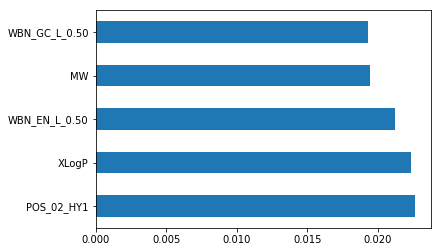

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

# Select best features for the label
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [8]:
# Create dataframe with olny the best features
x_train = x_train[['WBN_GC_L_0.50', 'MW', 'WBN_EN_L_0.50', 'XLogP', 'POS_02_HY1']]

x_test = x_test[['WBN_GC_L_0.50', 'MW', 'WBN_EN_L_0.50', 'XLogP', 'POS_02_HY1']]

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
from keras import layers


model = Sequential()
model.add(Dense(128, input_dim=5, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = optimizers.nadam(lr=.00005)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

Epoch 1/20
165/165 [==============================] - 1s 7ms/step - loss: 0.7801 - acc: 0.6727
Epoch 2/20
165/165 [==============================] - 0s 94us/step - loss: 0.6325 - acc: 0.6727
Epoch 3/20
165/165 [==============================] - 0s 101us/step - loss: 0.6320 - acc: 0.6727
Epoch 4/20
165/165 [==============================] - 0s 104us/step - loss: 0.6295 - acc: 0.6727
Epoch 5/20
165/165 [==============================] - 0s 106us/step - loss: 0.6299 - acc: 0.6727
Epoch 6/20
165/165 [==============================] - 0s 81us/step - loss: 0.6295 - acc: 0.6727
Epoch 7/20
165/165 [==============================] - 0s 114us/step - loss: 0.6349 - acc: 0.6727
Epoch 8/20
165/165 [==============================] - 0s 84us/step - loss: 0.6311 - acc: 0.6727
Epoch 9/20
165/165 [==============================] - 0s 95us/step - loss: 0.6304 - acc: 0.6727
Epoch 10/20
165/165 [==============================] - 0s 94us/step - loss: 0.6765 - acc: 0.6727
Epoch 11/20
165/165 [===============

In [19]:
score = model.evaluate(x_test, y_test, batch_size=128)
print('Score', score)

41/41 [==============================] - 0s 4ms/step
Score [0.7089667916297913, 0.6829267740249634]


This model did not fit very well to the data. This makes sense because if we look at the feature selection step best features measures at 0.02 which is not very high